Missing Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.7363

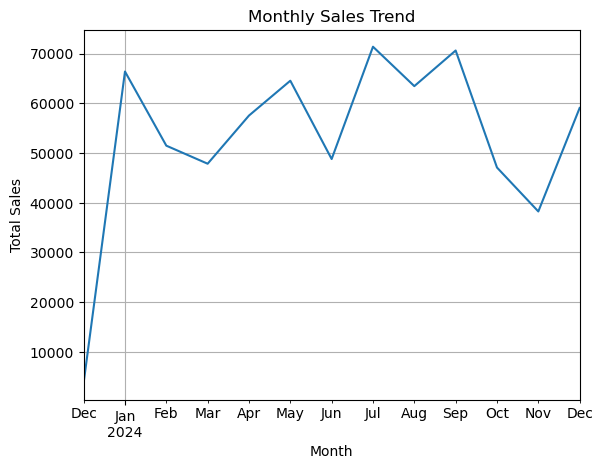

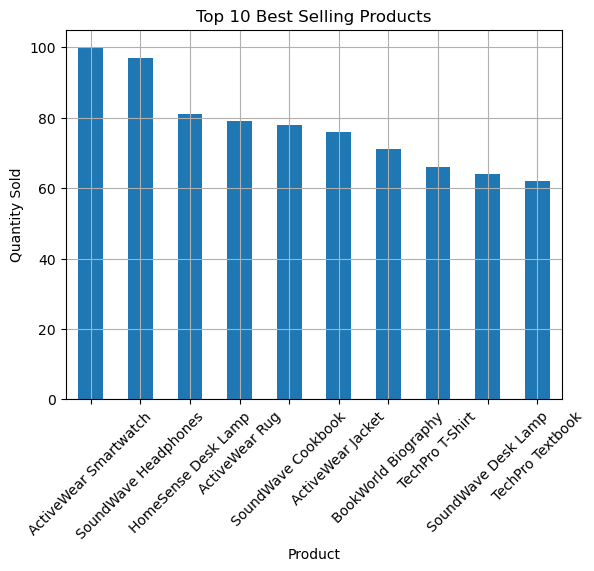

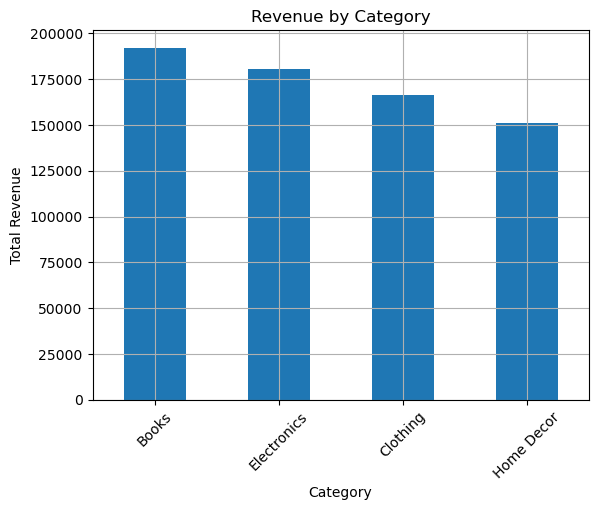

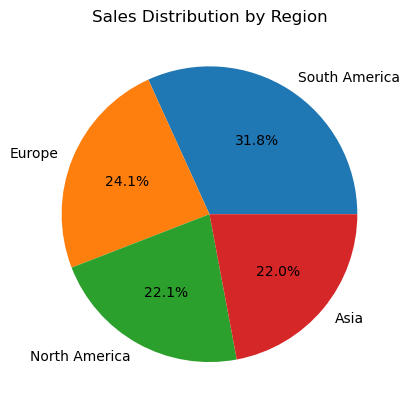

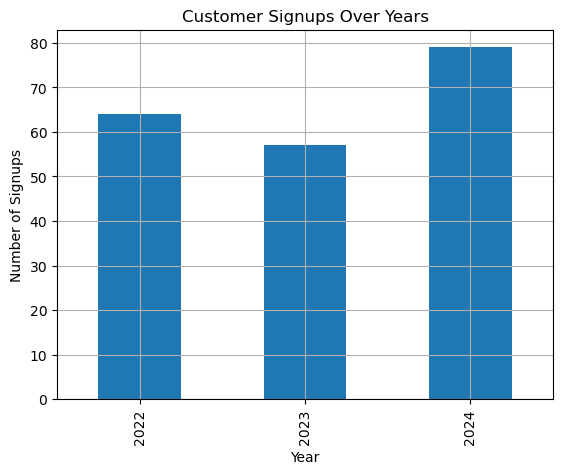

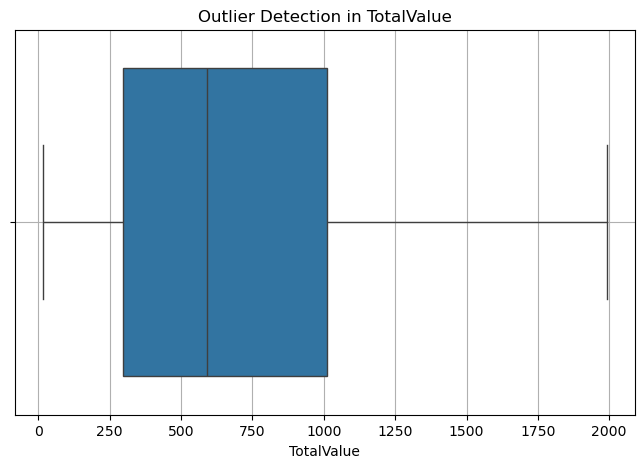

Available columns: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y', 'TransactionMonth'],
      dtype='object')
Identified Price columns: ['Price_x', 'Price_y']


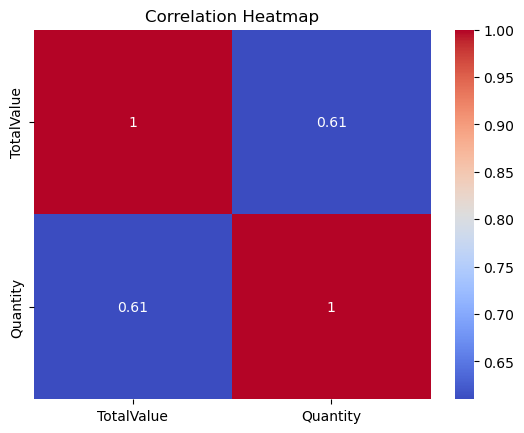

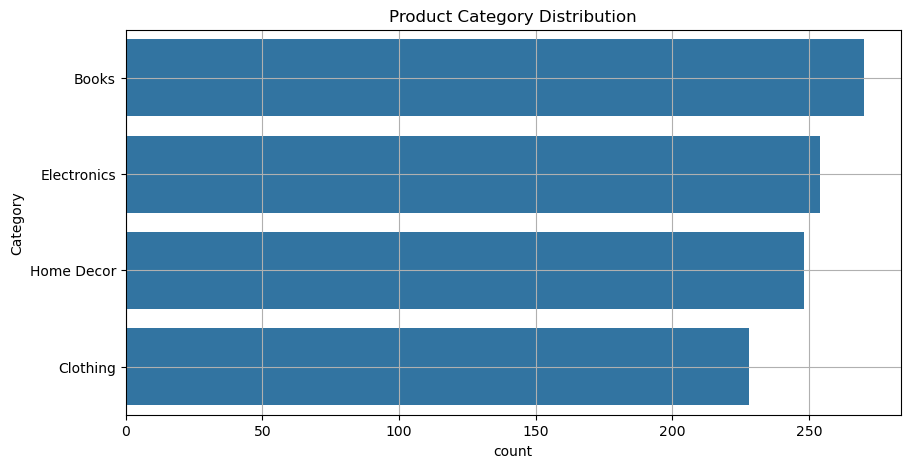

EDA Completed Successfully.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Convert to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge datasets
merged_df = transactions_df.merge(customers_df, on='CustomerID').merge(products_df, on='ProductID')

# Check for missing values
print("Missing Values:\n", merged_df.isnull().sum())

# Descriptive statistics
print(merged_df.describe())

# Sales trend analysis
merged_df['TransactionMonth'] = merged_df['TransactionDate'].dt.to_period('M')
sales_trend = merged_df.groupby('TransactionMonth')['TotalValue'].sum()
sales_trend.plot(kind='line', title='Monthly Sales Trend', xlabel='Month', ylabel='Total Sales', grid=True)
plt.show()

# Best-selling products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top 10 Best Selling Products', xlabel='Product', ylabel='Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Revenue by category
category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title='Revenue by Category', xlabel='Category', ylabel='Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Customer segmentation by region
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
region_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales Distribution by Region')
plt.ylabel('')
plt.show()

# Customer retention analysis
signup_counts = customers_df['SignupDate'].dt.year.value_counts().sort_index()
signup_counts.plot(kind='bar', title='Customer Signups Over Years', xlabel='Year', ylabel='Number of Signups')
plt.grid(True)
plt.show()

# Outlier detection
plt.figure(figsize=(8, 5))
sns.boxplot(x=merged_df['TotalValue'])
plt.title('Outlier Detection in TotalValue')
plt.grid(True)
plt.show()

print("Available columns:", merged_df.columns)

price_columns = [col for col in merged_df.columns if 'Price' in col]
print("Identified Price columns:", price_columns)

if 'Price' in merged_df.columns:
    correlation = merged_df[['TotalValue', 'Quantity', 'Price']].corr()
else:
    correlation = merged_df[['TotalValue', 'Quantity']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Category-wise distribution
plt.figure(figsize=(10, 5))
sns.countplot(y='Category', data=merged_df, order=merged_df['Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.grid(True)
plt.show()

print("EDA Completed Successfully.")
